### Connect to Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Load the parsed data text file as a DataFrame

In [1]:
import pandas as pd
# df = pd.read_csv ('/content/drive/MyDrive/vtt_data.txt', sep='\t')


df = pd.read_csv ('./parsed_vtt/vtt_data.txt', sep='\t')

In [2]:
df.head()

,episode index,guest,episode name,host name,episode number,file,transcript,duration
0,1,Max Tegmark,Life 3.0,Lex Fridman,1,episode_001_large.vtt,"As part of MIT course 6S099, Artificial Genera...",01:22:40
1,1,Max Tegmark,Life 3.0,Lex Fridman,1,episode_001_small.vtt,As part of MIT course 6S 099 Artificial Genera...,01:23:00
2,2,Christof Koch,Consciousness,Lex Fridman,2,episode_002_large.vtt,As part of MIT course 6S099 on artificial gene...,00:57:55
3,2,Christof Koch,Consciousness,Lex Fridman,2,episode_002_small.vtt,As part of MIT course 6S099 on artificial gene...,00:57:56
4,3,Steven Pinker,AI in the Age of Reason,Lex Fridman,3,episode_003_large.vtt,"You've studied the human mind, cognition, lang...",00:37:33


Split the DataFrame into 2 dataframes - for data generated from small and large models

In [3]:
df_small = df[df['file'].str.contains("small")].copy()
df_large = df[df['file'].str.contains("large")].copy()

Add columns for character count and word count

In [4]:
df_small['char_count'] = df_small['transcript'].str.len()
df_small['word_count'] = df_small['transcript'].apply(lambda x: len(x.split()))

df_large['char_count'] = df_large['transcript'].str.len()
df_large['word_count'] = df_large['transcript'].apply(lambda x: len(x.split()))

Add Column for episode duration in seconds

In [5]:
def get_seconds(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


In [6]:
def get_minutes(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m)

In [7]:
def get_avg_sentence_length(text):
  new_text = text.replace("!", ".")
  new_text = new_text.replace("?", ".")
  sents = new_text.split('.')
  avg_len = sum(len(x.split()) for x in sents) / len(sents)
  return avg_len

In [8]:
df_small["duration_seconds"] = df_small['duration'].apply(lambda x: get_seconds(x))
df_small["duration_minutes"] = df_small['duration'].apply(lambda x: get_minutes(x))
df_small["sentence_length"] = df_small['transcript'].apply(lambda x: get_avg_sentence_length(x))

df_large["duration_seconds"] = df_large['duration'].apply(lambda x: get_seconds(x))
df_large["duration_minutes"] = df_large['duration'].apply(lambda x: get_minutes(x))
df_large["sentence_length"] = df_large['transcript'].apply(lambda x: get_avg_sentence_length(x))

In [9]:
df_small.describe()

,episode index,episode number,char_count,word_count,duration_seconds,duration_minutes,sentence_length
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,160.299685,160.299685,118419.157729,21684.198738,7940.668770,131.842271,20.332403
std,92.962129,92.962129,53906.811698,10001.879637,3308.372155,55.152267,36.668388
min,1.000000,1.000000,26663.000000,4705.000000,1972.000000,32.000000,9.340230
25%,80.000000,80.000000,77338.000000,14202.000000,5437.000000,90.000000,13.673129
50%,160.000000,160.000000,110543.000000,20476.000000,7787.000000,129.000000,15.211465
75%,239.000000,239.000000,152577.000000,28353.000000,9997.000000,166.000000,17.201550
max,323.000000,323.000000,329107.000000,59923.000000,18900.000000,315.000000,426.470000


In [10]:
df_large.describe()

,episode index,episode number,char_count,word_count,duration_seconds,duration_minutes,sentence_length
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,161.329154,161.329154,118901.338558,21728.968652,7953.742947,132.075235,16.329808
std,93.574113,93.574113,53971.020275,9950.332615,3301.201874,55.014869,6.840925
min,1.000000,1.000000,26806.000000,4928.000000,1954.000000,32.000000,10.052317
25%,80.500000,80.500000,77056.000000,14121.000000,5446.500000,90.000000,14.090218
50%,161.000000,161.000000,111169.000000,20371.000000,7798.000000,129.000000,15.581675
75%,240.500000,240.500000,152707.000000,28344.000000,9998.500000,166.000000,16.899989
max,325.000000,325.000000,327433.000000,59475.000000,18896.000000,314.000000,107.479167


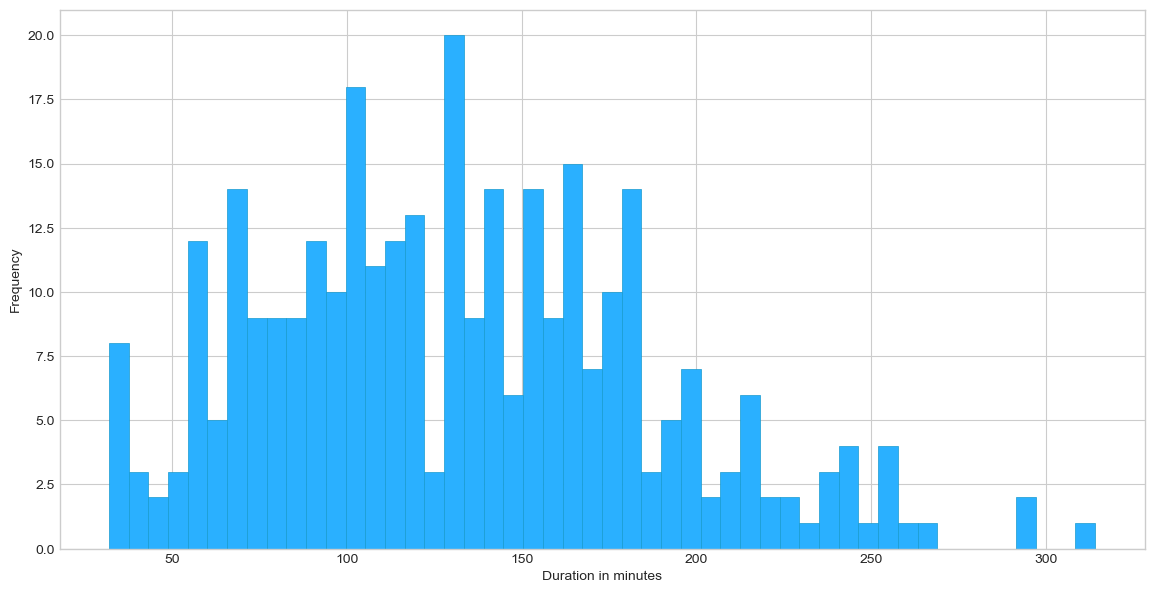

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_large['duration_minutes'], bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Distribution of Episode duration in minutes')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.show()

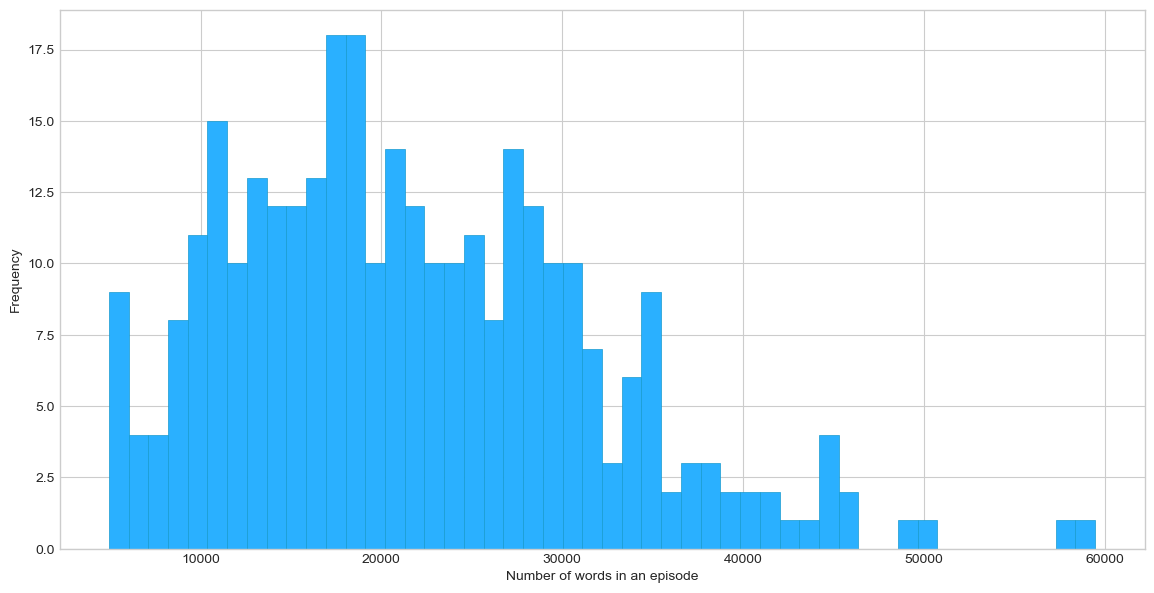

In [13]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_large['word_count'], bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Distribution of episode word count')
plt.xlabel('Number of words in an episode')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_small.head()

,episode index,guest,episode name,host name,episode number,file,transcript,duration,char_count,word_count,duration_seconds,duration_minutes,sentence_length
1,1,Max Tegmark,Life 3.0,Lex Fridman,1,episode_001_small.vtt,As part of MIT course 6S 099 Artificial Genera...,01:23:00,74305,13484,4980,83,19.696350
3,2,Christof Koch,Consciousness,Lex Fridman,2,episode_002_small.vtt,As part of MIT course 6S099 on artificial gene...,00:57:56,58900,10439,3476,57,14.013423
5,3,Steven Pinker,AI in the Age of Reason,Lex Fridman,3,episode_003_small.vtt,"You've studied the human mind, cognition, lang...",00:37:42,34196,6023,2262,37,17.662757
7,4,Yoshua Bengio,Deep Learning,Lex Fridman,4,episode_004_small.vtt,What difference between biological neural netw...,00:42:12,34014,5979,2532,42,18.980952
9,5,Vladimir Vapnik,Statistical Learning,Lex Fridman,5,episode_005_small.vtt,The following is a conversation with Vladimir ...,00:54:28,35973,6339,3268,54,9.890796


In [16]:
df_large.head()

,episode index,guest,episode name,host name,episode number,file,transcript,duration,char_count,word_count,duration_seconds,duration_minutes,sentence_length
0,1,Max Tegmark,Life 3.0,Lex Fridman,1,episode_001_large.vtt,"As part of MIT course 6S099, Artificial Genera...",01:22:40,74068,13424,4960,82,18.028188
2,2,Christof Koch,Consciousness,Lex Fridman,2,episode_002_large.vtt,As part of MIT course 6S099 on artificial gene...,00:57:55,57788,10217,3475,57,16.778325
4,3,Steven Pinker,AI in the Age of Reason,Lex Fridman,3,episode_003_large.vtt,"You've studied the human mind, cognition, lang...",00:37:33,33940,5989,2253,37,17.718935
6,4,Yoshua Bengio,Deep Learning,Lex Fridman,4,episode_004_large.vtt,What difference between biological neural netw...,00:42:18,34228,5993,2538,42,16.555249
8,5,Vladimir Vapnik,Statistical Learning,Lex Fridman,5,episode_005_large.vtt,The following is a conversation with Vladimir ...,00:54:02,36171,6374,3242,54,10.732323


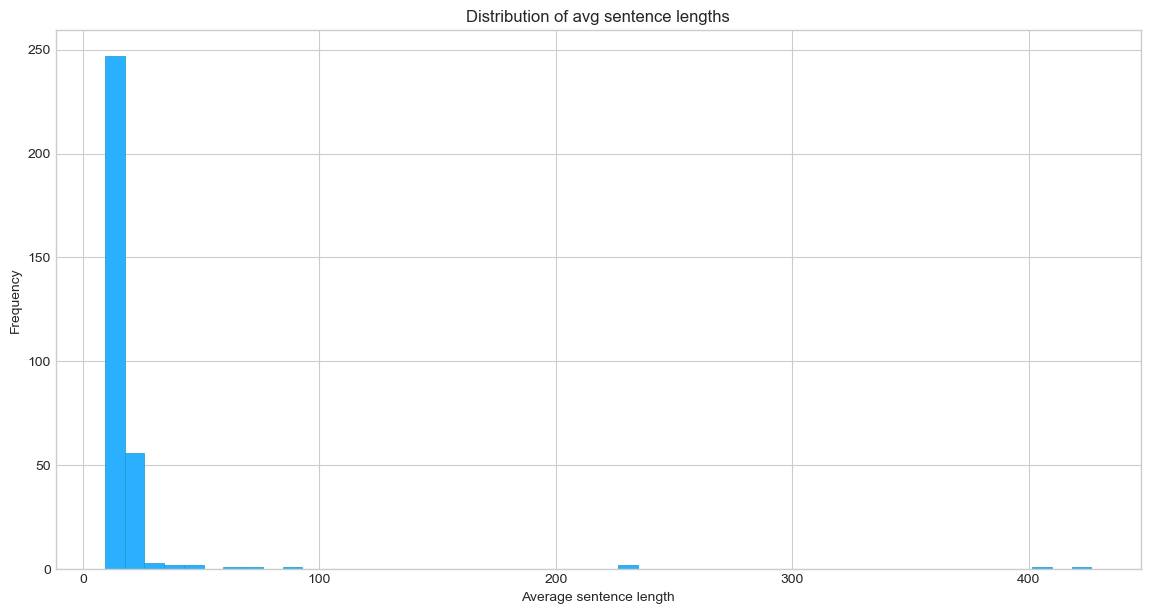

In [17]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_small['sentence_length'], bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of avg sentence lengths')
plt.xlabel('Average sentence length')
plt.ylabel('Frequency')
plt.show()

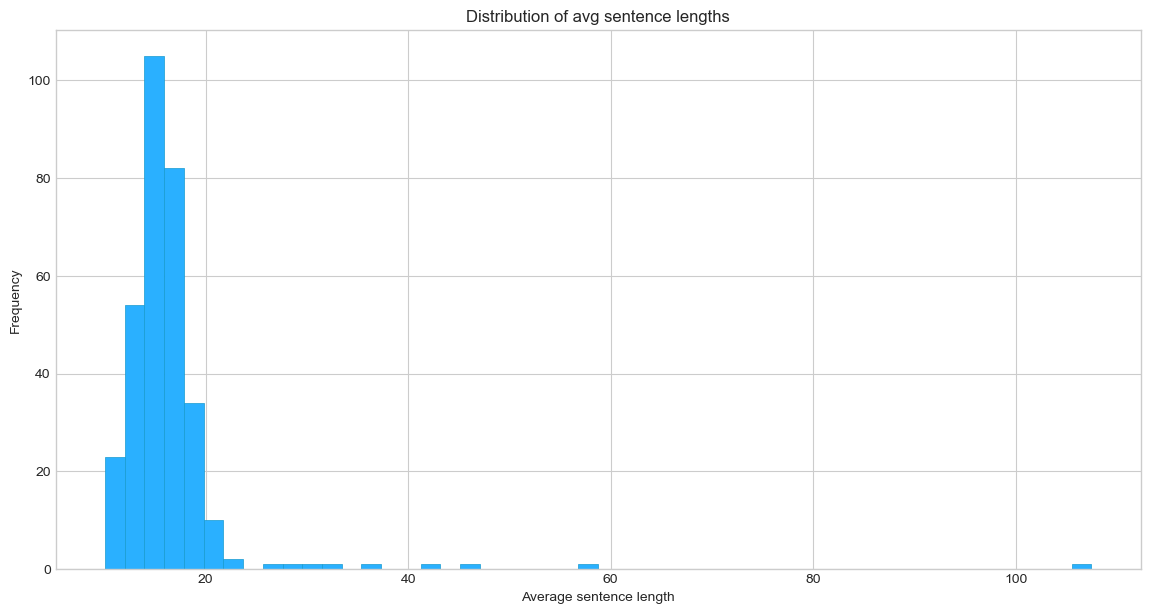

In [18]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_large['sentence_length'], bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of avg sentence lengths')
plt.xlabel('Average sentence length')
plt.ylabel('Frequency')
plt.show()

### Expand the contractions

In [19]:
import re
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the transcripts
df_large['transcript'] = df_large['transcript'].apply(lambda x:expand_contractions(x))

In [20]:
print(df_large['transcript'][0])

As part of MIT course 6S099, Artificial General Intelligence, I have gotten the chance to sit down with Max Tegmark. He is a professor here at MIT. He is a physicist, spent a large part of his career studying the mysteries of our cosmological universe. But he is also studied and delved into the beneficial possibilities and the existential risks of artificial intelligence. Amongst many other things, he is the cofounder of the Future of Life Institute, author of two books, both of which I highly recommend. First, Our Mathematical Universe. Second is Life 3.0. He is truly an out of the box thinker and a fun personality, so I really enjoy talking to him. If you would like to see more of these videos in the future, please subscribe and also click the little bell icon to make sure you do not miss any videos. Also, Twitter, LinkedIn, agi.mit.edu if you wanna watch other lectures or conversations like this one. Better yet, go read Max is book, Life 3.0. Chapter seven on goals is my favorite. I

## Lowercase the transcript

In [21]:
df_large['transcript']=df_large['transcript'].apply(lambda x: x.lower())

# Remove punctuation
df_large['transcript'] = \
df_large['transcript'].map(lambda x: re.sub('[,\.!?]', '', x))

In [22]:
print(df_large['transcript'][0])

as part of mit course 6s099 artificial general intelligence i have gotten the chance to sit down with max tegmark he is a professor here at mit he is a physicist spent a large part of his career studying the mysteries of our cosmological universe but he is also studied and delved into the beneficial possibilities and the existential risks of artificial intelligence amongst many other things he is the cofounder of the future of life institute author of two books both of which i highly recommend first our mathematical universe second is life 30 he is truly an out of the box thinker and a fun personality so i really enjoy talking to him if you would like to see more of these videos in the future please subscribe and also click the little bell icon to make sure you do not miss any videos also twitter linkedin agimitedu if you wanna watch other lectures or conversations like this one better yet go read max is book life 30 chapter seven on goals is my favorite it is really where philosophy a

## Remove digits and words containing digits

In [23]:
df_large['transcript']=df_large['transcript'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [24]:
print(df_large['transcript'][0])

as part of mit course  artificial general intelligence i have gotten the chance to sit down with max tegmark he is a professor here at mit he is a physicist spent a large part of his career studying the mysteries of our cosmological universe but he is also studied and delved into the beneficial possibilities and the existential risks of artificial intelligence amongst many other things he is the cofounder of the future of life institute author of two books both of which i highly recommend first our mathematical universe second is life  he is truly an out of the box thinker and a fun personality so i really enjoy talking to him if you would like to see more of these videos in the future please subscribe and also click the little bell icon to make sure you do not miss any videos also twitter linkedin agimitedu if you wanna watch other lectures or conversations like this one better yet go read max is book life  chapter seven on goals is my favorite it is really where philosophy and engine

In [27]:
# Importing Spacy
import spacy

from spacy.cli import download
print(download('en_core_web_sm'))



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.6 MB/s eta 0:00:006.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
None


In [28]:
# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df_large['lemmatized'] = df_large['transcript'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [29]:
print(df_large['lemmatized'][0])

mit course   artificial general intelligence get chance sit max tegmark professor mit physicist spend large career study mystery cosmological universe study delve beneficial possibility existential risk artificial intelligence thing cofounder future life institute author book highly recommend mathematical universe second life   truly box thinker fun personality enjoy talk like video future subscribe click little bell icon sure miss video twitter linkedin agimitedu wanna watch lecture conversation like well read max book life   chapter seven goal favorite philosophy engineering come open quote dostoevsky mystery human existence lie stay alive find live lastly believe failure reward opportunity learn sense fortunate fail new exciting way conversation different learn call radio frequency interference rfi look apparently music conversation local radio station bleed audio record way completely ruin audio exceptionally difficult sound source remove get opportunity learn avoid rfi future reco

## Remove stopwords and prepare text for LDA

In [33]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = df_large.transcript.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/bizon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['as', 'part', 'of', 'mit', 'course', 'artificial', 'general', 'intelligence', 'have', 'gotten', 'the', 'chance', 'to', 'sit', 'down', 'with', 'max', 'tegmark', 'he', 'is', 'professor', 'here', 'at', 'mit', 'he', 'is', 'physicist', 'spent', 'large', 'part']
['part', 'mit', 'course', 'artificial', 'general', 'intelligence', 'gotten', 'chance', 'sit', 'max', 'tegmark', 'professor', 'mit', 'physicist', 'spent', 'large', 'part', 'career', 'studying', 'mysteries', 'cosmological', 'universe', 'also', 'studied', 'delved', 'beneficial', 'possibilities', 'existential', 'risks', 'artificial']


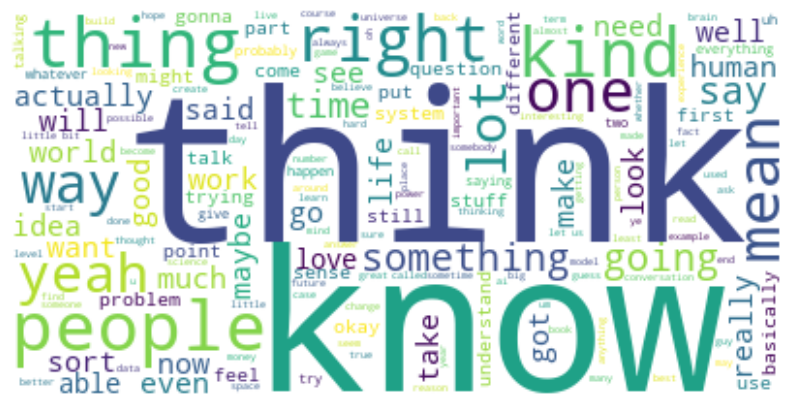

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all episode names into a single string
text = ' '.join(transcript for transcript in df_large['transcript'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [36]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 4), (1, 21), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 5), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 2), (18, 41), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


In [37]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"like" + 0.013*"know" + 0.012*"think" + 0.010*"people" + 0.008*"one" '
  '+ 0.008*"right" + 0.008*"kind" + 0.008*"things" + 0.007*"really" + '
  '0.007*"yeah"'),
 (1,
  '0.024*"like" + 0.017*"think" + 0.014*"know" + 0.012*"people" + '
  '0.008*"right" + 0.008*"kind" + 0.007*"yeah" + 0.007*"one" + 0.007*"would" + '
  '0.006*"thing"'),
 (2,
  '0.031*"like" + 0.017*"know" + 0.010*"think" + 0.007*"one" + 0.007*"well" + '
  '0.007*"mean" + 0.007*"would" + 0.007*"get" + 0.007*"right" + '
  '0.006*"people"'),
 (3,
  '0.025*"like" + 0.013*"think" + 0.011*"people" + 0.011*"know" + '
  '0.009*"would" + 0.007*"really" + 0.007*"right" + 0.007*"one" + 0.007*"kind" '
  '+ 0.007*"things"'),
 (4,
  '0.030*"like" + 0.019*"think" + 0.017*"know" + 0.010*"people" + 0.010*"one" '
  '+ 0.009*"would" + 0.008*"right" + 0.007*"yeah" + 0.007*"really" + '
  '0.007*"things"'),
 (5,
  '0.027*"like" + 0.016*"think" + 0.011*"know" + 0.010*"one" + 0.009*"right" + '
  '0.008*"people" + 0.008*"yeah" + 0.0

In [ ]:
# pip install bertopic

In [38]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_large['lemmatized'])

In [39]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,304,0_like_think_know_thing,"[like, think, know, thing, people, right, go, ...",[follow conversation michael malice anarchist ...
1,1,15,1_like_know_go_think,"[like, know, go, think, thing, yeah, people, t...",[follow conversation john clark friend brazili...


In [ ]:
# pip install youtube-search-python

In [40]:
from youtubesearchpython import *




'''
Searches for all types of results like videos, channels & playlists in YouTube.
'type' key in the JSON/Dictionary may be used to differentiate between the types of result.
'''
allSearch = VideosSearch('BOKCNUqbpH0', limit = 10, language = 'en', region = 'US')
print(allSearch.result())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
{'result': [{'type': 'video', 'id': 'BOKCNUqbpH0', 'title': 'Omar Suleiman: Islam | Lex Fridman Podcast #352', 'publishedTime': '1 year ago', 'duration': '3:02:53', 'viewCount': {'text': '1,936,179 views', 'short': '1.9M views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/BOKCNUqbpH0/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLC9iqIgZBCGfEKyTMjwf33hXfBq2w', 'width': 360, 'height': 202}, {'url': 'https://i.ytimg.com/vi/BOKCNUqbpH0/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLArnnc0kY8kqlTztLjueOLA5pnGSw', 'width': 720, 'height': 404}], 'richThumbnail': {'url': 'https://i.ytimg.com/an_webp/BOKCNUqbpH0/mqdefault_

In [41]:

'''
Searches for all types of results like videos, channels & playlists in YouTube.
'type' key in the JSON/Dictionary may be used to differentiate between the types of result.
'''
allSearch = VideosSearch('oFSyNdQf5uk', limit = 10, language = 'en', region = 'US')
print(allSearch.result())

{'result': [{'type': 'video', 'id': 'oFSyNdQf5uk', 'title': 'Omar Suleiman: Palestine, Gaza, Oct 7, Israel, Resistance, Faith & Islam | Lex Fridman Podcast #411', 'publishedTime': '2 weeks ago', 'duration': '2:22:19', 'viewCount': {'text': '542,373 views', 'short': '542K views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/oFSyNdQf5uk/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLCVARepI7DR6pn3q1E7McV2xfaOrQ', 'width': 360, 'height': 202}, {'url': 'https://i.ytimg.com/vi/oFSyNdQf5uk/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLAToFMblB-W3Q1QwkYGSeb_ELlt-Q', 'width': 720, 'height': 404}], 'richThumbnail': {'url': 'https://i.ytimg.com/an_webp/oFSyNdQf5uk/mqdefault_6s.webp?du=3000&sqp=CN6vxK4G&rs=AOn4CLAUlKooJmSMl9t-x9xchPY5XLG8Vg', 'width': 320, 'height': 180}, 'descriptionSnippet': [{'text': 'OUTLINE: 0:00 - Introduction 1:36 - Oct 7 10:32 - Palestinian diaspora 14:47 - Wael Al-Dahdouh 29:39 - Violence 53:17 - Biden\xa0...'}], 'cha

In [42]:

'''
Searches for all types of results like videos, channels & playlists in YouTube.
'type' key in the JSON/Dictionary may be used to differentiate between the types of result.
'''
allSearch = VideosSearch('oFSyNdQf5uk', limit = 10, language = 'en', region = 'US')
print(allSearch.result())

{'result': [{'type': 'video', 'id': 'oFSyNdQf5uk', 'title': 'Omar Suleiman: Palestine, Gaza, Oct 7, Israel, Resistance, Faith & Islam | Lex Fridman Podcast #411', 'publishedTime': '2 weeks ago', 'duration': '2:22:19', 'viewCount': {'text': '542,373 views', 'short': '542K views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/oFSyNdQf5uk/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLCVARepI7DR6pn3q1E7McV2xfaOrQ', 'width': 360, 'height': 202}, {'url': 'https://i.ytimg.com/vi/oFSyNdQf5uk/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLAToFMblB-W3Q1QwkYGSeb_ELlt-Q', 'width': 720, 'height': 404}], 'richThumbnail': {'url': 'https://i.ytimg.com/an_webp/oFSyNdQf5uk/mqdefault_6s.webp?du=3000&sqp=CN6vxK4G&rs=AOn4CLAUlKooJmSMl9t-x9xchPY5XLG8Vg', 'width': 320, 'height': 180}, 'descriptionSnippet': [{'text': 'OUTLINE: 0:00 - Introduction 1:36 - Oct 7 10:32 - Palestinian diaspora 14:47 - Wael Al-Dahdouh 29:39 - Violence 53:17 - Biden\xa0...'}], 'cha